<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

Подгрузили необходимые библиотеки

In [2]:
APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

model_df = pd.read_csv('/datasets/query_1.csv')
model = spark.createDataFrame(model_df)

city_df = pd.read_csv('/datasets/query_3.csv')
city = spark.createDataFrame(city_df)

print(model)
print(city)

DataFrame[model: string, flights_amount: bigint]
DataFrame[city: string, average_flights: double]


Загнали наши датасеты в PySpark

Вроде бы все данные в допустимых форматах

In [3]:
spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()

In [4]:
model = spark.read.load('/datasets/query_1.csv', 
                       format='csv', header='true', inferSchema='true')

city = spark.read.load('/datasets/query_3.csv', 
                       format='csv', header='true', inferSchema='true')

model.show(5)
city.show(5)

+---------------+--------------+
|          model|flights_amount|
+---------------+--------------+
|Airbus A319-100|           607|
|Airbus A321-200|           960|
| Boeing 737-300|           630|
| Boeing 767-300|           600|
| Boeing 777-300|           300|
+---------------+--------------+
only showing top 5 rows

+-----------+------------------+
|       city|   average_flights|
+-----------+------------------+
|     Абакан| 3.870967741935484|
|    Анадырь|               1.0|
|      Анапа| 2.161290322580645|
|Архангельск| 5.354838709677419|
|  Астрахань|2.4516129032258065|
+-----------+------------------+
only showing top 5 rows



Посмотрели значения в наших датафреймах. Все в пределах разумного

In [5]:
print(model.describe().show())
print(city.describe().show())

+-------+-------------------+------------------+
|summary|              model|    flights_amount|
+-------+-------------------+------------------+
|  count|                  8|                 8|
|   mean|               null|          2035.625|
| stddev|               null|1965.2039470679445|
|    min|    Airbus A319-100|               300|
|    max|Sukhoi SuperJet-100|              4557|
+-------+-------------------+------------------+

None
+-------+---------+-----------------+
|summary|     city|  average_flights|
+-------+---------+-----------------+
|  count|      101|              101|
|   mean|     null|5.494189113891766|
| stddev|     null|13.11979040852178|
|    min|   Абакан|              1.0|
|    max|Ярославль|129.7741935483871|
+-------+---------+-----------------+

None


Пропуски не найдены. Только по какой-то причине максимальным значением у городов стал Ярославль, а не Москва. Странно

Далее такая ошибка себя не проявила

In [6]:
model.registerTempTable("model")
city.registerTempTable("city")

Регистрируем временные таблицы

In [7]:
city_top = spark.sql("SELECT city, average_flights FROM CITY ORDER BY average_flights DESC LIMIT 10")
print(city_top.show())

+---------------+------------------+
|           city|   average_flights|
+---------------+------------------+
|         Москва| 129.7741935483871|
|Санкт-Петербург|31.161290322580644|
|    Новосибирск|17.322580645161292|
|     Красноярск|11.580645161290322|
|   Екатеринбург| 11.32258064516129|
| Ростов-на-Дону|10.193548387096774|
|          Пермь|10.129032258064516|
|         Брянск|              10.0|
|           Сочи| 9.612903225806452|
|      Ульяновск| 9.580645161290322|
+---------------+------------------+

None


Вывел топ-10 городов по среднему количеству с помощью SQL. Не очень понятно, требовалось ли это или можно было использовать обычный pandas

Я не очень понял, как визуализировать DataFrame из Pyspark и взял выборки из обычного DataFrame, чтобы визуализировать. Самый малоизящный способ, пожалуй, но кроме барплота, который сюда четко вписывается, придумать ничего не получилось

Если у тебя есть хорошая литература по вопросам визуализации, подкинь пожалуйста, потому что у меня в этом пробел, видимо

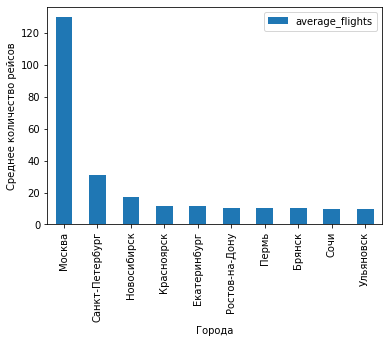

In [8]:
city_top_df = city_df.sort_values(by='average_flights', ascending=False).head(10)
city_top_df.plot(x='city', y='average_flights', kind='bar')
plt.xlabel('Города')
plt.ylabel('Среднее количество рейсов')
plt.show()

Естественно, самое большое среднее количество рейсов идет в городах милионниках, они и заняли первые места нашего топа. Если бы мы анализировали данные 2020-2021 год, на первое место поднялся бы Сочи

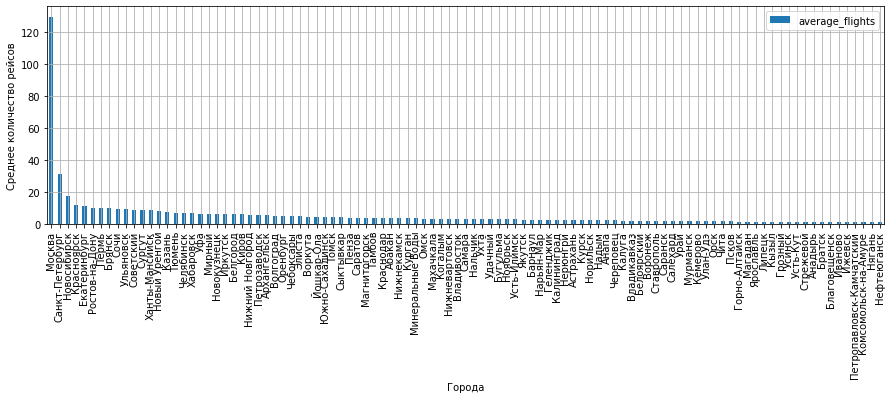

In [9]:
(city_df.sort_values(by='average_flights', ascending=False)
    .plot(x='city', y='average_flights', kind='bar', grid=True, figsize=(15,4)))
plt.xlabel('Города')
plt.ylabel('Среднее количество рейсов')
plt.show()

Как смогли растянули все возможные значения по городам. После пиков милионников, можно наблюдать очень равномерно размазанную картину значений

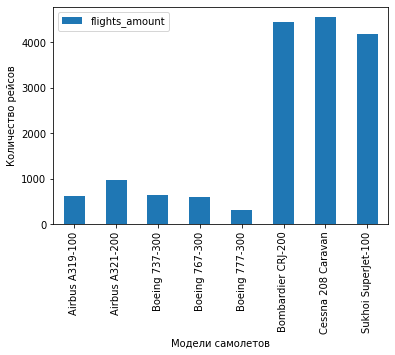

In [10]:
model_df.plot(x='model', y='flights_amount', kind='bar')
plt.xlabel('Модели самолетов')
plt.ylabel('Количество рейсов')
plt.show()

Активнее всего летает самая маленькая Cessna. Скорее всего из-за доступности она является самым популярным региональным самолетом, возможно даже пользуется спросом у частников

Чуть меньшие значения показывает Bombardier, следом идет чуть более вместительный Superjet

Boeing и Airbus застряли в одной скромной вилке значений. Благодаря вместительности, вероятно, нет смысла организовывать сопоставимое с "малышами" количество рейсов